**Exercice 2**

La remarque principale pour résoudre ces systèmes est que si $G$ est une bdg de $I$ un idéal de $k[x_1, \cdots, x_n]$, alors $I = (G)$ et ainsi $V(I) = V((G)) = V(G)$. Ainsi si $f_1, \cdots, f_r$ sont des polynômes, alors résoudre $f_i(a) = 0$ pour tout $i$ revient à vérifier que $a \in V(f_1, \cdots, f_r) = V((f_1, \cdots, f_r))$. Alors si $G = \{g_1, \cdots, g_l\}$ est une bdg de $(f_1, \cdots, f_r)$, $a$ est solution du système si et seulement si $g_j(a) = 0$ pour tout $1 \leq j \leq l$. Maintenant il peut être plus facile de résoudre ce deuxième système, surtout si on prend une bdg pour l'ordre lex : en effet, les équations vont avoir de moins en moins de variables (au vu du théorème  d'élimination) et on résout en premier les équations ayant peu de variables pour savoir quels sont les choix possibles pour ces variables.

**1.**

In [25]:
A.<x,y> = PolynomialRing(QQ, order = 'lex')
I = A.ideal(x^2 + y^2 - 25, x^2 - 9 - y)
G = I.groebner_basis()
print(G)

[x^2 - y - 9, y^2 + y - 16]


In [46]:
H = G[-1].univariate_polynomial()
R = H.roots(SR, multiplicities = false)
for rr in R:
    F = G[0](y = rr)
    print(solve(F, x))

[
x == -sqrt(-1/2*sqrt(65) + 17/2),
x == sqrt(-1/2*sqrt(65) + 17/2)
]
[
x == -sqrt(1/2*sqrt(65) + 17/2),
x == sqrt(1/2*sqrt(65) + 17/2)
]


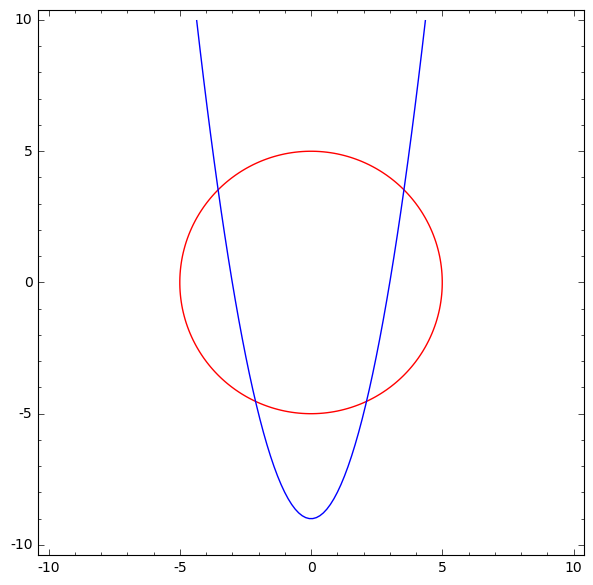

In [45]:
implicit_plot(I.gens()[0], (x, -10, 10), (y, -10, 10), color = 'red') + implicit_plot(I.gens()[1], (x, -10, 10), (y, -10, 10), color = 'blue')

**2.**

In [62]:
A.<x,y,z> = PolynomialRing(QQ, order= 'lex')
I = A.ideal(x^2 + y^2 - 1, z - x + y, z^2 - x - y)
G = I.groebner_basis()
print(G)

[x - 1/2*z^2 - 1/2*z, y - 1/2*z^2 + 1/2*z, z^4 + z^2 - 2]


In [63]:
R = G[-1].univariate_polynomial().roots(CC, multiplicities = false)
print(R)

[-1.00000000000000, 1.00000000000000, -1.41421356237310*I, 1.41421356237310*I]


In [66]:
for zz in R:
    print(G[0](z = zz).univariate_polynomial().roots(CC))
    print(G[1](z = zz).univariate_polynomial().roots(CC))

[(0.000000000000000, 1)]
[(1.00000000000000, 1)]
[(1.00000000000000, 1)]
[(0.000000000000000, 1)]
[(-1.00000000000000 - 0.707106781186548*I, 1)]
[(-1.00000000000000 + 0.707106781186548*I, 1)]
[(-1.00000000000000 + 0.707106781186548*I, 1)]
[(-1.00000000000000 - 0.707106781186548*I, 1)]


In [70]:
V = I.variety(CC)
V

[{y: 1.00000000000000, z: -1.00000000000000, x: 0.000000000000000},
 {y: -1.00000000000000 + 0.707106781186548*I, z: -1.41421356237310*I, x: -1.00000000000000 - 0.707106781186548*I},
 {y: -1.00000000000000 - 0.707106781186548*I, z: 1.41421356237310*I, x: -1.00000000000000 + 0.707106781186548*I},
 {y: 0.000000000000000, z: 1.00000000000000, x: 1.00000000000000}]

**3.**

In [4]:
A.<x, y ,z, c> = PolynomialRing(QQ, order = 'lex')
I = A.ideal(c*x + x*y^2 + x*z^2 - 1, c*y + y*x^2 + y*z^2 - 1, c*z + z*x^2 + z*y^2 - 1)
G = I.groebner_basis()
G

[x*y + 1/729*y^2*c^9 + 5/54*y^2*c^6 + 29/27*y^2*c^3 + 2/729*y*z^6*c^8 + 5/27*y*z^6*c^5 + 58/27*y*z^6*c^2 + 1/243*y*z^4*c^9 + 5/18*y*z^4*c^6 + 29/9*y*z^4*c^3 + 1/729*y*z^3*c^8 + 5/54*y*z^3*c^5 + 29/27*y*z^3*c^2 + 1/729*y*z^2*c^10 + 5/54*y*z^2*c^7 + 29/27*y*z^2*c^4 + 1/729*y*z*c^9 + 5/54*y*z*c^6 + 29/27*y*z*c^3 - 1/729*y*c^8 - 5/54*y*c^5 - 29/27*y*c^2 - 11/729*z^13*c^8 - 244/243*z^13*c^5 - 256/27*z^13*c^2 + 4/243*z^12*c^7 + 304/243*z^12*c^4 + 340/27*z^12*c - 77/1458*z^11*c^9 - 2566/729*z^11*c^6 - 896/27*z^11*c^3 - 28/9*z^11 + 55/1458*z^10*c^8 + 715/243*z^10*c^5 + 2320/81*z^10*c^2 - 209/2916*z^9*c^10 - 1165/243*z^9*c^7 - 1228/27*z^9*c^4 - 88/9*z^9*c + 1/54*z^8*c^9 + 403/243*z^8*c^6 + 401/27*z^8*c^3 + 4/3*z^8 - 275/5832*z^7*c^11 - 9233/2916*z^7*c^8 - 2438/81*z^7*c^5 - 167/27*z^7*c^2 - 77/5832*z^6*c^10 - 77/108*z^6*c^7 - 233/27*z^6*c^4 - 19/3*z^6*c - 11/729*z^5*c^12 - 5921/5832*z^5*c^9 - 2309/243*z^5*c^6 + 16/27*z^5*c^3 + 3*z^5 - 13/972*z^4*c^11 - 5075/5832*z^4*c^8 - 8719/972*z^4*c^5 - 34/9

...